# Prac 2 - Getting the Data I need

## Part 1 - Assessing the Ethical Use of Data

An important ethical consideration for releasing data is making sure that it is is properly de-anonymised. In this part of the pratical, we will demonstrate how a dataset that at first seems  anonymised may potentially be de-anonymised. We will also walk through some potential steps to mitigate this risk.

Let's say we have been given access to an *anonymised* dataset containing UQ student GPA information. Someone has attempted to anonymise this dataset by removing student names and IDs from the data. Download the dataset onto your lab machine:

[student_data_anon.csv](./student_data_anon.csv)

Let's also say we've managed to access a separate dataset that contains names, ages and postcodes from a UQ sporting club. Download the dataset onto your lab machine:

[club_data.csv](./club_data.csv)

Using the club dataset, can we possibly de-anonymise some of the students contained within the GPA dataset? Have a look at both datasets and their headers in Excel, can you think of any ways we can combine the two datasets to determine the names of the students in the anonymised student data?

### Databases

In the first prac we imported data from a single flat file using R. Data is commonly spread across multiple data sets or files, and often more insightful information can be gained by combining several datasets.

One solution for exploring multiple datasets is to import the datasets into a *database*. In this practical, we will look at the relational database `MySQL`, which uses a standard format to interact, merge and answer questions with data called SQL (Structured Query Language).

We will demonstrate the use of exploring multiple datasets by attempting to *de-anonymise* data after importing it into `MySQL`.

### Importing into Phpmyadmin
phpMyAdmin is a web tool designed to handle administrating MySQL databases. Your zone already has MySQL and phpMyAdmin configured, you can find it at `https://data7001-sXXXXXX.uqcloud.net/phpmyadmin` (replacing sXXXXXX with your student number).

The first thing we need to do is import our CSV files into phpMyAdmin. If the CSV is in the correct format, MySQL will parse the CSV file, create the associated `table` and import the data into the table as rows. A MySQL table consists of rows and columns. Columns specify the *type* of data (e.g. whether it is text, a number, a 'True' or 'False' value etc) and the rows contain the actual data itself. Below is a visual representation of a MySQL table, as displayed by phpMyAdmin:

![](img/mysql-table-in-phpmyadmin.png)

Let's import the `student_data_anon.csv` file first. On the top menu of phpMyAdmin, select the `Import` option. Under the **File To Import** header, click the 'Choose File' button and browse to the location of `student_data_anon.csv` on the local system. Under the **Format** header, select `CSV` in the drop down menu, and enable the option "The first line of the file contains the table column names". Then press the "Go" button.

This will create a database called "CSV_DB" and a table called "TBL_NAME" (both generic filler names) which is then filled in with the values from our CSV file. Let's rename the table name to something more meaningful - click on the `TBL_NAME` table on the left under `CSV_DB`. In this menu, click the **Operations** tab in the top menu and rename the database to `student_data_anon` under **Table Options** and press the 'Go' button.

Let's import our second dataset now - `club_data.csv`. First click `CSV_DB` on the left hand menu so we are operating within the same database as our first dataset. Then press the "Import" tab on the top menu and follow the same steps previously outlined to import our second dataset. Rename the new table to `club_data`.

### Exploring The Data

Let's now have a look at how we can use SQL to ask some interesting questions about the data. Click on CSV_DB again in the left hand column and then click the 'SQL' tab on the top menu.

This menu allows us to query the database using the SQL language. 

For example, we might ask something like - how many females are in our dataset? Try pasting in the following SQL query into the bottom input box under **SQL query on database CSV_DB:** and then press `Submit Query`.

```
SELECT COUNT( * ) 
FROM student_data_anon
WHERE gender =  'F'
```

We can add as many filters as we want to start asking more specific questions - how many females in our dataset had a GPA less than 4?

```
SELECT COUNT( * ) 
FROM student_data_anon
WHERE gender =  'F'
AND GPA < 4.0
```

You can see from the above example queries that SQL statements follow a general format. We have a `SELECT <x>` query that specifies what specific results we want - in this case, the `COUNT(*)` function returns the number of rows that matches a specified criteria. We then have a `FROM` statement which specifies which **table** we want to pull our results from. We could easily run the first query against the `club_data` table (how many women are in the club_data dataset?) with the following syntax:

```
SELECT COUNT( * )
FROM club_data
WHERE gender = 'F'
```

The last `WHERE` clause specifies our filter, and the `AND` statement can be used to add more filters.

|<center>TASK</center>|
| ---- |
| Modify and execute the above query to determine how many **men** had a GPA **greater than** 4.0 in our `student_data_anon` table? |

In [25]:
267

[1] 267

SELECT COUNT( * ) 
FROM student_data_anon
WHERE gender =  'M'
AND GPA > 4.0
[ Add your response here! ]

### Combining Tables
So we now know how to do some very basic queries across a single table. However, we want to be able to use *both tables* to see if we can use information from the club data to identify some of the users in the student dataset. This `club_data` dataset will be our *adversarial* dataset.

As gender, age and postcode are available in both datasets, these three fields will be our *quasi-identifiers*. Quasi-identifiers are pieces of information that, alone, are not able to uniquely identifiy a record. However, they are correlated enough to potentially create a unique identifier.

In our student data example, trying to identify a student based on gender, age or postcode alone would be difficult. However, the combination of all three may be sufficient to identify individuals.

Our goal is to use our `club_data` dataset which contains these quasi identifiers to deanonymise this data. We can achieve this by using an *inner join* in MySQL. An inner join allows us to match rows in one table with rows in another table only if both tables meet the conditions specified.

For example, let's say we have only 2 entries in club_data that looks like the following:

| gender | age | postcode | firstname | surname  |
|--------|-----|----------|-----------|----------|
| F      | 23  | 4068     | Jane      | Anderson |
| M      | 20  | 4044     | Thomas    | Hill     |

We also have 3 entries in student_data_anon that looks like the following:

| gender | age | postcode | GPA |
|--------|-----|----------|-----|
| M      | 31  | 4011     | 5.3 |
| F      | 23  | 4068     | 5.5 |
| F      | 20  | 4000     | 4.0 |

Is there a combination of gender, age and postcode that appear in both tables?

If we do an *inner-join* on the tables on these elements, we can combine the tables on these matching entries, and get a result that looks like the following:

| gender | age | postcode | firstname | surname  | GPA |
|--------|-----|----------|-----------|----------| --- |
| F      | 23  | 4068     | Jane      | Anderson | 5.5 |

You can see from this example that an *inner-join* is the act of selecting *matching entries* for specific *identifiers* from two different tables.

![](img/inner-join.png)

Let's do the same thing to our actual datasets and see if we can get potentially match individuals to their GPA. Open the SQL editor again, and submit the following query:
```
SELECT c . * , s.GPA
FROM club_data c
INNER JOIN (
  SELECT gender, age, postcode, GPA
  FROM student_data_anon
  GROUP BY gender, age, postcode
) s ON (
  (
    s.gender = c.gender
  ) AND (
    s.age = c.age
  ) AND (
    s.postcode = c.postcode
  )
)
```

|<center>QUESTION</center>|
| ---- |
| Are there any *gender,age,postcode* combinations that have more than one  matching individual? What are they?|

[Answer: There are 16 gender, age, postcode combinations that have more than one matching individual.
List: {F,19,4066}, {F,20,4067}, {F,23,4068}, {F,27,4104}, {F,32,4169}, {F,50,4075}, {M,20,4102}, {M,22,4075} ,{M,24,4169}, {M,25,4120}, {M,26,4064}, {M,26,4101}, {M,28,4075}, {M,28,4169}, {M,35,4066}, {M,41,4102} 

Code: 

SELECT c. * , s.GPA
FROM club_data c
INNER JOIN (

SELECT gender, age, postcode, GPA
FROM student_data_anon
GROUP BY gender, age, postcode
)s ON ( (
s.gender = c.gender
)
AND (
s.age = c.age
)
AND (
s.postcode = c.postcode
) ) 
GROUP BY gender, age, postcode
HAVING COUNT( * ) >1
]

|<center>QUESTION</center>|
| ---- |
| What is Sharon Payne's GPA? |

[Answer: Sharon Payne's GPA is 2.0

Code: 
SELECT c . * , s.GPA
FROM club_data c
INNER JOIN (
  SELECT gender, age, postcode, GPA
  FROM student_data_anon
  GROUP BY gender, age, postcode
) s ON (
  (
    s.gender = c.gender
  ) AND (
    s.age = c.age
  ) AND (
    s.postcode = c.postcode
  )
)
WHERE first_name="Sharon" AND last_name="Payne"
]

### K-Anonymity
The above examples demonstrate that student_data_anon, despite having the names removed, is still vulnerable to de-anonymisation with an adversarial dataset. One potential method of better anonymising the data is to make sure it satisfies the *k-anonymity* property for our quasi-identifiers of gender, age and postcode.

So far we have only *read* data from MySQL, but for this part of the prac we want to modify the data in the database using the `UPDATE` command.

Let's first copy our original database so we do not lose any accidental data! First click on the database name on the left column, `CSV_DB`. Then, one the top menu, click the 'Operations' tab. Under the 'Copy Database To' heading, give your database copy the name `CSV_DB_CP`, and make sure "Structure and data" and "CREATE DATABASE before copying" and "Add AUTO_INCREMENT value" is selected.

We will now perform all our queries on our new copy of the database, click the 'CSV_DB_CP' database on the left and open the Query menu again.

Recall from your lectures that k-anonymity property is satisfied for each individual if for each unique combination of quasi-identifiers, there are *at least k-1 individuals whose information also appear in the dataset*.

We can use the following SQL statement to demonstrate how many individual rows match certain combinations of gender, age and postcode:

```
SELECT gender, age, postcode, COUNT( * ) AS count
FROM student_data_anon
GROUP BY gender, age, postcode
```

Can we modify our anonymised student data such that there is at least two rows in every unique combination of gender, age and postcode (2-anonymity)?

One solution may be to rounding the ages to the nearest decade. So a student who's age is 17 get's changed to 20, and a student who's 34 get's changed to 30.

We can use the MySQL "round()" function to round values.

Enter the following command to update the ages in the `student_data_anon` table to the nearest decade.

```
UPDATE student_data_anon SET age = ROUND(age, -1)
```

Make sure it worked by examining the table:

```
SELECT * 
FROM student_data_anon
```

Do we have less unique combinations now? Let's try our original combination count query but limit results to only those that have a count of "1":

```
SELECT gender, age, postcode, COUNT( * ) AS count
FROM student_data_anon
GROUP BY gender, age, postcode
HAVING COUNT( * ) = 1
```

Unfortunately it looks like there are still unique combinations. What if we round postcodes to the nearest decade, too?

```
UPDATE student_data_anon SET postcode = ROUND(postcode, -1)
```

It looks like we still have a few issues - many students over 40 are still uniquely identifiable, and it looks like students that had data entry issues without a gender specified are also still unique.

One potential solution might be to remove any entries that have poor data, so our dataset only includes full entries. Lets submit another query where all entries that have an empty 'gender' column are removed:

```
DELETE FROM student_data_anon WHERE gender =  ''
```

Let's also update ages so that any entry with an age greater than 50 is set to 50:

```
UPDATE student_data_anon SET age = 50 WHERE age > 50
```

Let's have a look again to see if we still have any unique combinations:
```
SELECT gender, age, postcode, COUNT( * ) AS count
FROM student_data_anon
GROUP BY gender, age, postcode
HAVING COUNT( * ) = 1
```

It looks like we have successfully removed all unique identifying combinations of our *quasi-identifiers*, gender, age and postcode!

We can use the following query to find the new minimum frequency of each combination of gender, age and postcode:

```
SELECT MIN( mycount ) 
FROM (
SELECT COUNT( * ) mycount
FROM student_data_anon
GROUP BY gender, age, postcode
) AS counts
```

|<center>TASK</center>|
| ---- |
| What level of k-anonymity is our dataset now? |

Answer: The database is 2 level of K-anonymity now, with elements as age and postcode.

## Part 2 - Hadoop Distributed Filesystem (HDFS)
In the previous exercise we demonstrated ingesting data from a flat CSV file into a *database*, where we used SQL to explore the data. While databases like MySQL are effective at analysing small datasets, we begin to run into complex scalability issues when the size of the dataset exceeds what can be stored on a single machine. We can continue to add more disk space as the dataset grows, but then we begin to run into problems with processing speed - a single CPU can only process so much data off disk at a time.

A potential solution is to scale the work *and the data* over *multiple machines*, so that processing occurs in parallel across several machines and several different hard disks. Scaling up this sort of infrastructure would just involve adding new machines, and is often referred to as *horizontal scaling*.

One solution that uses horizontal scaling for storing large datasets for processing is the *Hadoop Distributed Filesystem (HDFS)*. A distributed file system is simply a file system where the data is stored on a server, not the local client machine. In HDFS, *where* the data is stored is abstracted away from the user. You can browse the data as if you were browsing on a local machine, however the dataset could potentially be stored across many different computers.

In this part of the prac, we will gain some familiarity with the HDFS command line tools, and ingest some data into HDFS to be explored in future pracs.

### Remotely connect to the remote DATA7001 node
Open the ‘Terminal’ program on the lab PC. Use SSH to connect to the DATA7001 Client Node, entering your UQ student password at the prompt.

NOTE: Your password won't appear on the screen as you type it in, this is to be expected – just type your password and hit the `return` key.

```
ssh <username>@clientnode.zones.eait.uq.edu.au
```

You should be presented with a screen that looks like this:

```
     ____________
     |   \XX/   |
     | T. \/ .T |      University of Queensland
     | XX:  :XX |          Faculty of EAIT
     T L' /\ 'J T
      \  /XX\  /
   @\_ '______' _/@
   \_X\_ ____ _/X_/
     \=/\----/\=/

-----------------------------------------------
              DATA7001 Client Node
-----------------------------------------------
[sXXXXXX@data7001 ~]$
```

### Download the HR Analytics Dataset

You can download the HR Analytics dataset onto the client node using the wget program. Like other unix programs, you can use the manual page to learn about how to use it. Try using the command `man wget` to read the manual for the wget program. The typing the letter `q` will exit the man page.

Run the command `wget https://stluc.manta.uqcloud.net/mdatascience/public/datasets/HumanResourceAnalytics/HR_comma_sep.csv` to download the HR analytics dataset onto the data7001 node.

|<center>TASK</center>|
| ---- |
|  Use `wget` to download the HR Analytics Dataset from the link specified at the beginning of the prac. |

### Move data between the local filesystem and HDFS
So far we have downloaded the HR Analytics Dataset to the local filesystem. To be able to use the Hadoop tools, we first have to push the file from our local filesystem into HDFS.

As HDFS is modelled similarly to the Unix filesystem, many of the commands will seem similar to local filesystem commands. We will be using the `hadoop fs` set of commands, an overview can be found on the Hadoop file system shell documentation page:

https://hadoop.apache.org/docs/r2.7.1/hadoop-project-dist/hadoop-common/FileSystemShell.html 

`hadoop fs -ls` for example is analogous to the ls command on the local filesystem.

To push a local file into HDFS, we can use:

`hadoop fs -put [local path] [hdfs path]`

For example, I can push a file called “testfile” into the /tmp directory of HDFS with the following command:

`$ hadoop fs -put testfile /tmp/testfile`

To read a file from HDFS, we first need to copy it onto our local filesystem. To copy a file from HDFS to our local filesystem, we can use the following command:

`hadoop fs -get [hdfs path] [local path]`

 For example, I can get the file we just pushed into `/tmp/testfile` on HDFS and rename it `testfile2` on my local system with the following command:
 
 `$ hadoop fs -get /tmp/testfile testfile2`
 
To see what the file says, we can use the program cat (a command line program that can (among other things) output the contents of a file onto the terminal:

```
$ cat testfile
hello world!
```

|<center>$ hadoop fs -put SECRET /tmp/SECRET
$ hadoop fs -get /tmp/SECRET SECRET2
$ cat SECRET2
</center>|
| ---- |
|  What does the file called `SECRET` within your home directory on HDFS contain? |

[Answer: OTXo0t5js4YXaA==

Code:
$ hadoop fs -put SECRET /tmp/SECRET
$ hadoop fs -get /tmp/SECRET SECRET2
$ cat SECRET2]

|<center>TASK</center>|
| ---- |
|  Use the hadoop fs tools to push the HR Analytics dataset you downloaded from the previous question into your home directory in HDFS. |

## Part 3 - Reasoning with sampling strategies


### Simple Random Sampling

As we saw in lectures, simple random sampling with replacement (SRSWR) can be accomplised as follows.  

Suppose the rows of the n by d array "data" correspond to entries from which we wish to resample m times.

The syntax of the R command is:

`datasample<-data[sample(1:n,m,replace=TRUE),]`

Let us try this now with the anonymised student data.  

We will now load the data into R and display summary statistics.

Note that, for simplicity, we will drop any rows with missing data, and only deal with complete cases.

In [9]:
library(readr)
data <- read_csv("./student_data_anon.csv")
data <- data[complete.cases(data),]
summary(data)
mean(data$age)

Parsed with column specification:
cols(
  id = col_integer(),
  gender = col_character(),
  GPA = col_double(),
  age = col_integer(),
  postcode = col_integer(),
  program = col_character()
)


       id           gender               GPA             age       
 Min.   :  0.0   Length:835         Min.   :1.040   Min.   :18.00  
 1st Qu.:223.5   Class :character   1st Qu.:3.505   1st Qu.:23.00  
 Median :450.0   Mode  :character   Median :4.720   Median :29.00  
 Mean   :447.8                      Mean   :4.539   Mean   :31.46  
 3rd Qu.:673.5                      3rd Qu.:5.680   3rd Qu.:37.00  
 Max.   :897.0                      Max.   :6.990   Max.   :72.00  
    postcode      program         
 Min.   :4000   Length:835        
 1st Qu.:4067   Class :character  
 Median :4101   Mode  :character  
 Mean   :4088                     
 3rd Qu.:4105                     
 Max.   :4169                     

[1] 31.46347

We will now take a SRSWR of size 100 from the 835 case-complete rows, and compute the mean GPA of the sample.

In [10]:
datasample<-data[sample(1:nrow(data),100,replace=TRUE),]
mean(datasample$GPA)

[1] 4.0824

Suppose we are interested in calculating the mean GPA by gender, as well as the number of observations by gender.  

We will now do so.

In [11]:
aggregate(GPA~gender, datasample, mean)
aggregate(GPA~gender, datasample, length)

gender,GPA
F,3.990500
M,4.143667


gender,GPA
F,40
M,60


We have taken a single SRSWR from our overall dataset and computed the mean GPA by gender.  

Repeated resampling is the basis of **bootstrapping**, wherein one constructs a set of statistics of the repeated samples.

For more information on Bootstrapping, see pp 189 to 190 of the following text: http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Sixth%20Printing.pdf

These then give one an empirical understanding of the distribution of those statistics as they relate to the population of interest.

We will now compute and store the mean by gender for a SRSWR of size 100 repeatedly (1000 times), compute summary statistics of the mean by gender, and display a histogram of the mean by gender.

In [12]:
meanGPAbygender<-data.frame(sample=integer(),FGPA=double(),MGPA=double())
for (i in 1:1000){
    datasample<-data[sample(1:nrow(data),100,replace=TRUE),]
    temp<-as.data.frame(aggregate(GPA~gender, datasample, mean))
    temp$gender<-NULL
    meanGPAbygender[i,]<-c(i,t(temp))
}

summary(meanGPAbygender)

     sample            FGPA            MGPA      
 Min.   :   1.0   Min.   :3.975   Min.   :3.773  
 1st Qu.: 250.8   1st Qu.:4.454   1st Qu.:4.339  
 Median : 500.5   Median :4.605   Median :4.474  
 Mean   : 500.5   Mean   :4.604   Mean   :4.469  
 3rd Qu.: 750.2   3rd Qu.:4.749   3rd Qu.:4.603  
 Max.   :1000.0   Max.   :5.224   Max.   :5.093  

Now let us plot the histograms.

A histogram is a simple and widely used graphical representation of the distribution of numerical data.  

The range of data is partitioned into bins, and the number of data entries in each bin (the frequencies) are counted.  The histogram is then constructed as a collection of rectangles whose base is the bin and whose height is the corresponding bin's frequency.  See also https://en.wikipedia.org/wiki/Histogram 

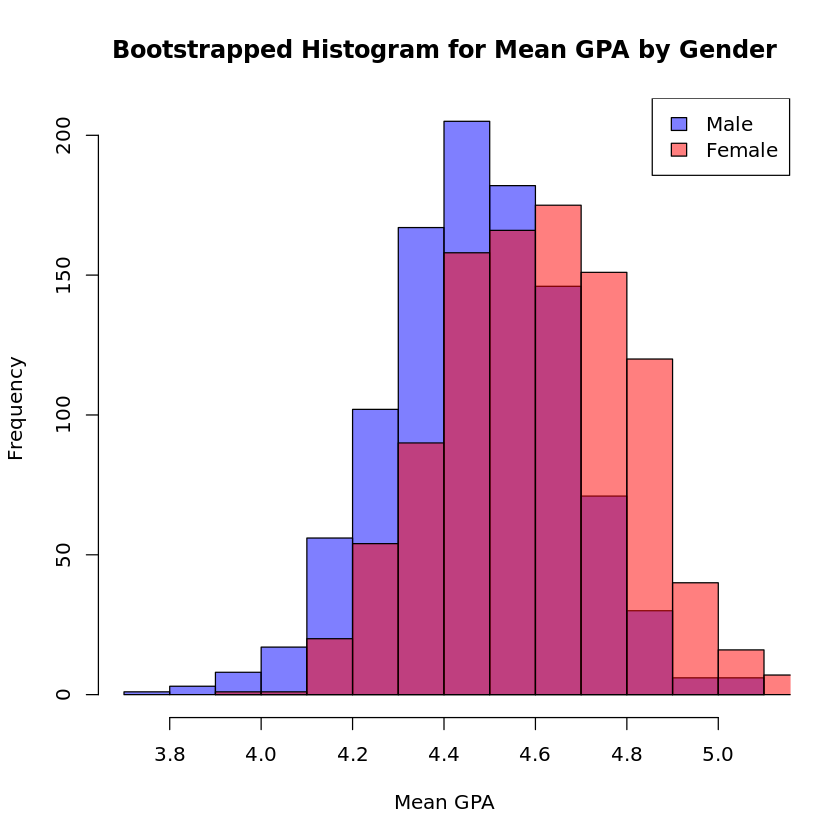

In [13]:
hist(meanGPAbygender$MGPA, col=rgb(0,0,1,0.5),main="Bootstrapped Histogram for Mean GPA by Gender", xlab="Mean GPA")
hist(meanGPAbygender$FGPA, col=rgb(1,0,0,0.5),add=TRUE)
legend("topright", c("Male","Female"),fill=c(rgb(0,0,1,0.5), rgb(1,0,0,0.5)))

|<center>Task</center>|
| ---- |
| From the histograms and summary statistics above, what can you say about the comparitive *location* or *central tendency* of the mean GPA between the two groups?  How about the comparitive *spread* or *variability* of the mean GPA? |

[Answer: 
Firstly, according to the graph, the mean and median of the GPA of female students' are both higher than that of male students, the conclusion could be obtained that female students achieved a better GPA than male students.
Secondly, the range of deviation of female students' GPA is 1.249, calculated out by the difference between max GPA(5.224) and min GPA (3.975), smaller than male students' GPA deviation, which is 3.773. It means that the female students' GPA is more stable than male students', and with a higher study quality.]

### Weighted Random Sampling

For SRSWR, each observation is equally likely to appear in the sample.  Sometimes, we wish to select each observation with a probability proportional to a specified weight.  As an illustrative example, we may have demographic data from the ABS which tells us the actual proportions of males and females by age-group enrolled at university, and we wish to correct for *sampling bias*.

For the purposes of this practical, we will create a non-negative weight without any special meaning for each of the n rows in our data set.

In [26]:
# Generate some random weights which are non-negative and sum to 1
data$weights<-runif(nrow(data))
data$weights<-data$weights/sum(data$weights)

weighteddatasample<-data[sample(1:nrow(data),100,replace=TRUE,data$weights),]

|<center>Task</center>|
| ---- |
| Using this sampling approach, repeat the steps we carried out for SRSWR to create a Weighted Sample Bootstrapped Histogram for Mean GPA by Gender. |

Parsed with column specification:
cols(
  id = col_integer(),
  gender = col_character(),
  GPA = col_double(),
  age = col_integer(),
  postcode = col_integer(),
  program = col_character()
)


     sample            FGPA              MGPA        
 Min.   :   1.0   Min.   :0.03436   Min.   :0.03281  
 1st Qu.: 250.8   1st Qu.:0.04365   1st Qu.:0.04250  
 Median : 500.5   Median :0.04606   Median :0.04470  
 Mean   : 500.5   Mean   :0.04610   Mean   :0.04475  
 3rd Qu.: 750.2   3rd Qu.:0.04868   3rd Qu.:0.04691  
 Max.   :1000.0   Max.   :0.06184   Max.   :0.05488  

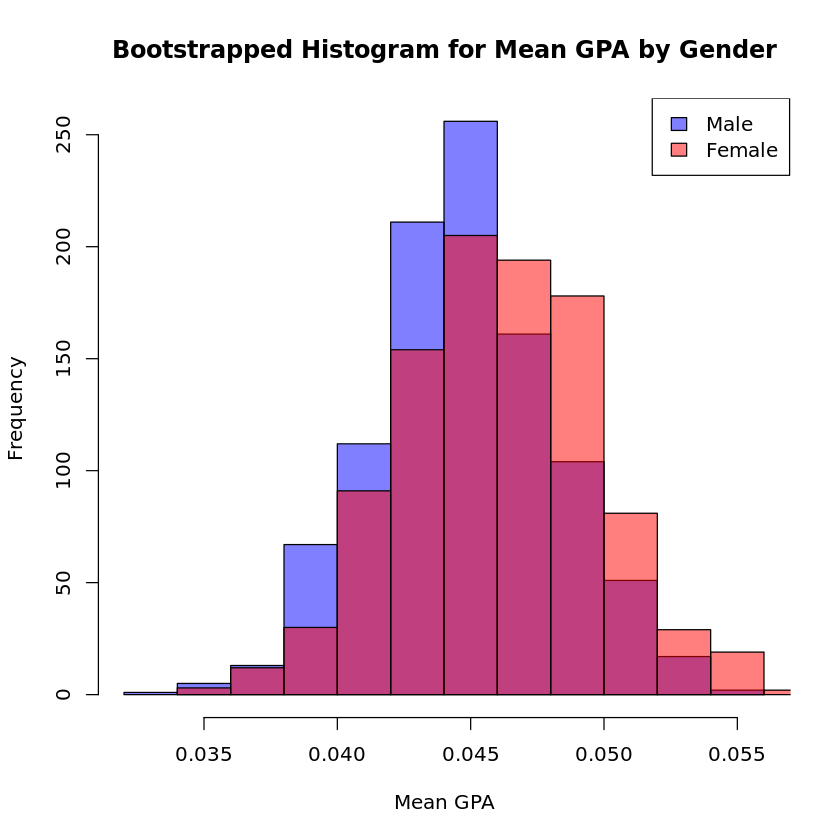

In [33]:
# Write your code here!
library(readr)
data <- read_csv("./student_data_anon.csv")
data <- data[complete.cases(data),]
meanGPAbygender<-data.frame(sample=integer(),FGPA=double(),MGPA=double())

for (i in 1:1000){
    datasample<-data[sample(1:nrow(data),100,replace=TRUE),]
    datasample$weights <- runif(nrow(datasample))
    datasample$weights <- datasample$weights/sum(datasample$weights)
    datasample$GPAnew = datasample$GPA*datasample$weights
    temp <-as.data.frame(aggregate(GPAnew~gender, datasample, mean))
    temp$gender <-NULL
    meanGPAbygender[i,] <-c(i,t(temp))
}

summary(meanGPAbygender)

hist(meanGPAbygender$MGPA, col=rgb(0,0,1,0.5),main="Bootstrapped Histogram for Mean GPA by Gender", xlab="Mean GPA")
hist(meanGPAbygender$FGPA, col=rgb(1,0,0,0.5),add=TRUE)
legend("topright", c("Male","Female"),fill=c(rgb(0,0,1,0.5), rgb(1,0,0,0.5)))

### Stratified Sampling

For Stratifed Sampling on s strata, we generate a SRSWR of size k for each and then combine to obtain an sample of size m=sk.  In the combined sample, each of the s strata has exactly k samples represented.

One way to achieve this in R is illustrated below.  

First we generate some random data with two strata.

In [30]:
sv<-data.frame(variable=double(),strata=integer())
sv[1:10,1]<-rnorm(10)
sv[1:10,2]<-as.numeric(sv[,1]>0)

Second, we split the data into two subsets, one for each stratum.

In [31]:
sv0<-sv[sv$strata==0,]$variable
sv1<-sv[sv$strata==1,]$variable

Third, we perform SRSWR to sample three times from each subset and then combine.

In [32]:
sv0sample<-sv0[sample(1:length(sv0),3,replace=TRUE)]
sv1sample<-sv1[sample(1:length(sv1),3,replace=TRUE)]
svsample<-rbind(sv0sample,sv1sample)

|<center>TASK</center>|
| ---- |
| Apply stratified sampling with strata `gender`, with 50 samples in each stratum. Using this sampling approach, repeat the steps we carried out for SRSWR to create a Stratified Sample Bootstrapped Histogram for Mean GPA by Gender. |

Parsed with column specification:
cols(
  id = col_integer(),
  gender = col_character(),
  GPA = col_double(),
  age = col_integer(),
  postcode = col_integer(),
  program = col_character()
)


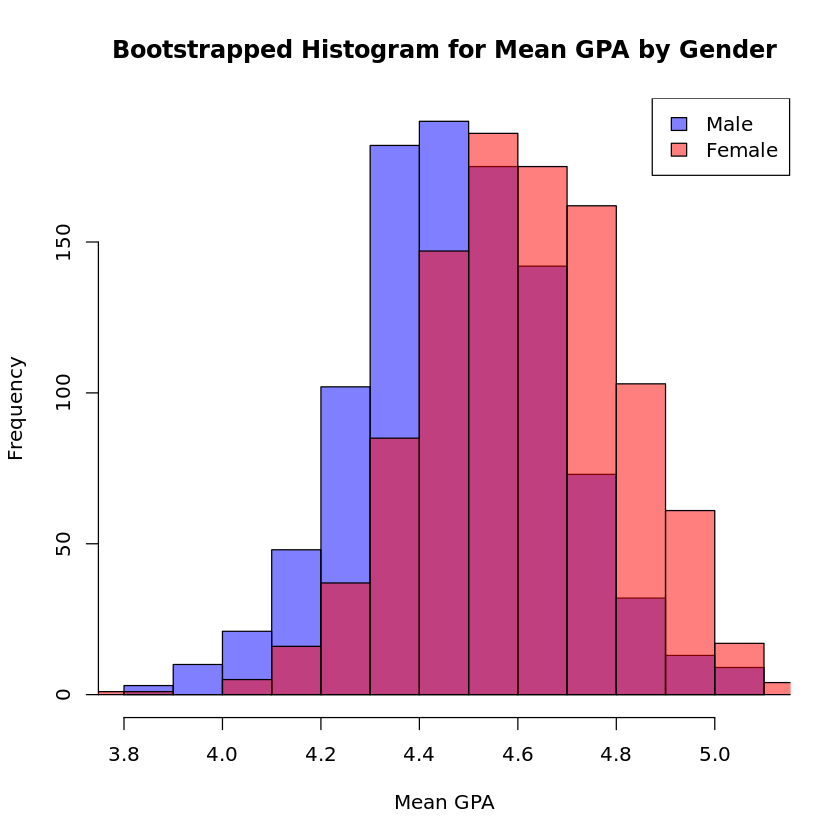

In [35]:
# Write your code here!
library(readr)
data <- read_csv("./student_data_anon.csv")
data <- data[complete.cases(data),]
meanGPAbygender<-data.frame(FGPA=double(),MGPA=double())

for (i in 1:1000){
  data_female <- data[data$gender=="F",]$GPA         # save category 1 into Sv0
  data_male <- data[data$gender=="M",]$GPA           # save category 2 into Sv1
  data_female_sample<-data_female[sample(1:length(data_female),50,replace=TRUE)]     #random choose 50 number from sv0
  data_male_sample<-data_male[sample(1:length(data_male),50,replace=TRUE)]           #random choose 50 number from sv1
  
  meanGPAbygender[i,1]= sum(data_female_sample)/50
  meanGPAbygender[i,2]= sum(data_male_sample)/50

}

  hist(meanGPAbygender$MGPA, col=rgb(0,0,1,0.5),main="Bootstrapped Histogram for Mean GPA by Gender", xlab="Mean GPA")
  hist(meanGPAbygender$FGPA, col=rgb(1,0,0,0.5),add=TRUE)


  legend("topright", c("Male","Female"),fill=c(rgb(0,0,1,0.5), rgb(1,0,0,0.5)))

# Extension

We have included some extra material demonstrating how data has been generated for the k-anonymity part of this prac, and how the Python programming language could alternatively be used for the K-anonymity task.

**THIS IS NOT ASSESSED**

If you are interested, you can read through the notebooks in the [data_preparation](data_preparation) folder of Prac 2. Try to see if you can follow what is being done.

The `KAnonymityWithPython` notebook demonstrates how you could potentially use the Python programming language instead of MySQL to perform the K-anonymity task of this practical.

The `GetUQPrograms` notebook demonstrates *web-scraping*, which was used to generate the dataset used in this prac by scraping real programs from the https://www.uq.edu.au/study/browse.html?level=ugpg page.

The `GenerateCSVs` notebook demonstrates how we can use Python to generate some sample data.
These three notebooks demonstrate how you could potentially use the Python programming language instead of MySQL to perform the the K-anonymity task of this practical. 